In [77]:
import pandas as pd
import numpy as np
import random
import scipy.stats
import math
import seaborn as sns
from matplotlib import pyplot as plt
from random import sample
from scipy.stats import chisquare
from scipy.stats import geom
from scipy.stats import t
from scipy import stats
z90 = 1.645
z95 = 1.96
z99 = 2.576
%matplotlib inline

In [78]:
df = pd.read_csv("data/heads_tails_game.csv")

a) n = 50 , p0 = 0.5, phat = 0.28, 1-p0 = 0.5
H0: yusuf'un oyun tarzı, random sallama yönteminden daha iyi değil. p = .5
HA: yusuf'un oyun tarzı, random sallama yönteminden daha iyi. p != .5
- independence condition satisfied since the poll is randomly sampled.
- success-failure condition: p0 * n = 25.0, (1-p0) * n = 25.0 // satisfied.
SE = sqrt(p(1-p)/n) = sqrt((0.5*0.5)/50) = 0.07071067811865475
z* = -3.1112698372208087
p-value = 0.00186
0.00186 < .05'dan küçük olduğu için boş hipotezi(H0) reddederiz ve yusuf'un rastgele sallamadan daha iyi iş çıkardığını,
yani oyun stratejisinin başarılı olduğunu söyleyebiliriz.


Text(0.5, 1.0, 'p-value visualization')

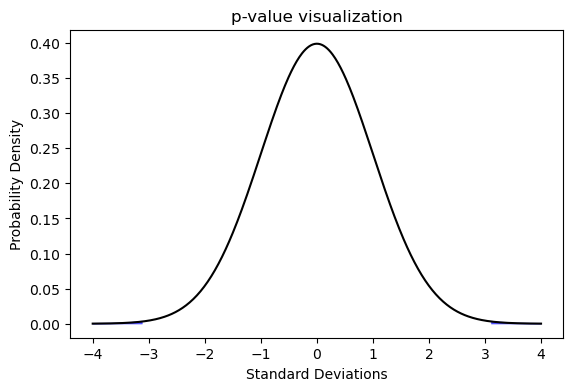

In [80]:
n = df["index"].count()
p0 = .5
minus_p = 1 - p0
bingo = df[df["outcome"] == 1]["index"].count()
phat = bingo/n
succ = p0 * n
fail = minus_p * n
se = np.sqrt(p0*minus_p / n) # calculate standard error for null value p0
z = (phat-p0)/se # how many standard errors away the phat is from the null value in the null distribution
pvalue = scipy.stats.norm.sf(abs(z))*2 # find p-value for two-tailed test,
two_z = [z,z*(-1)]

print('''a) n = {n} , p0 = {p0}, phat = {phat}, 1-p0 = {minus_p}
H0: yusuf'un oyun tarzı, random sallama yönteminden daha iyi değil. p = .5
HA: yusuf'un oyun tarzı, random sallama yönteminden daha iyi. p != .5
- independence condition satisfied since the poll is randomly sampled.
- success-failure condition: p0 * n = {succ}, (1-p0) * n = {fail} // satisfied.
SE = sqrt(p(1-p)/n) = sqrt(({p0}*{minus_p})/{n}) = {se}
z* = {z}
p-value = {pvalue}
{pvalue} < .05'dan küçük olduğu için boş hipotezi(H0) reddederiz ve yusuf'un rastgele sallamadan daha iyi iş çıkardığını,
yani oyun stratejisinin başarılı olduğunu söyleyebiliriz.'''.format(n=n,p0=p0,phat=phat, minus_p= minus_p, succ=succ, fail=fail, se = se,z=z,pvalue=format(pvalue, '.5f')))

fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)

ax_conf = fig.add_subplot(1,2,2)
y = stats.norm.pdf(x)

ax_conf.plot(x, y, color='black',label=f' z-distribution')
ax_conf.fill_between(x, y, color='blue', alpha=0.5, where= ((x<min(two_z)) | (x>max(two_z))) ,label="confidence interval")
ax_conf.set_ylabel('Probability Density')
ax_conf.set_xlabel('Standard Deviations')
ax_conf.set_title('p-value visualization')